In [252]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from graphviz import Digraph
import torch


In [253]:
words = open('names.txt', 'r').read().splitlines()

for word in words[:10]:
  print(word)



emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn


In [254]:
b = {}
for word in words:
  chs = ['<S>'] + list(word) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram]=b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


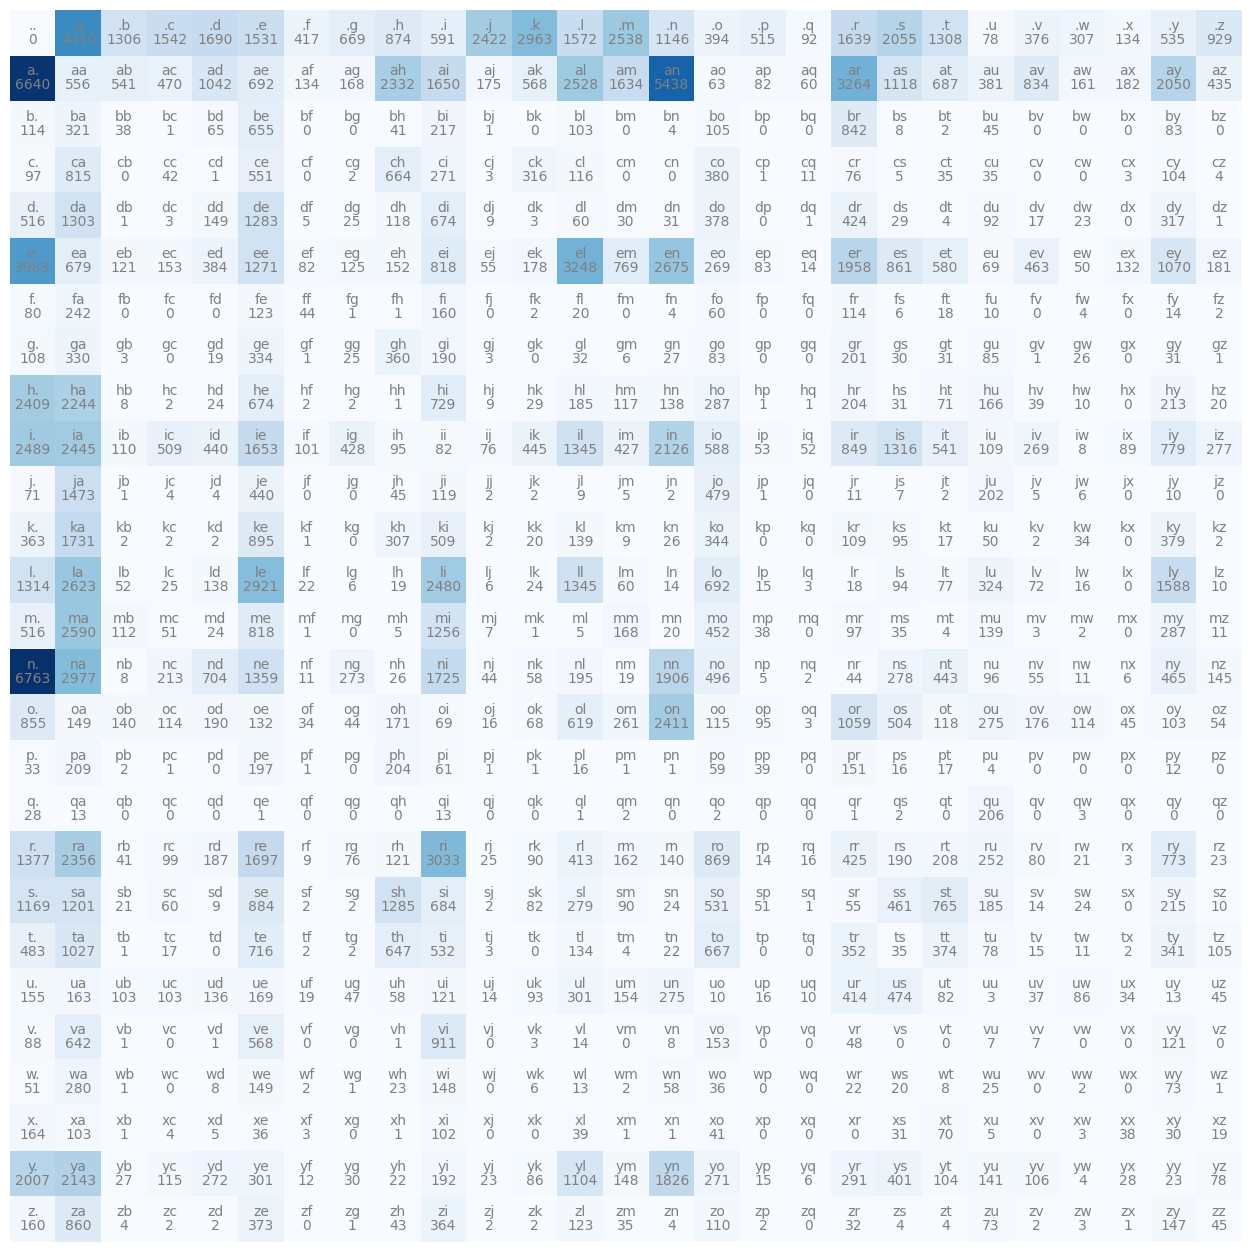

In [255]:

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
print(stoi)
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

N = torch.zeros((27,27),dtype=torch.int32)
for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    row = stoi[ch1]
    col = stoi[ch2]
    N[row,col] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [256]:

g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(itos[ix], end='')
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


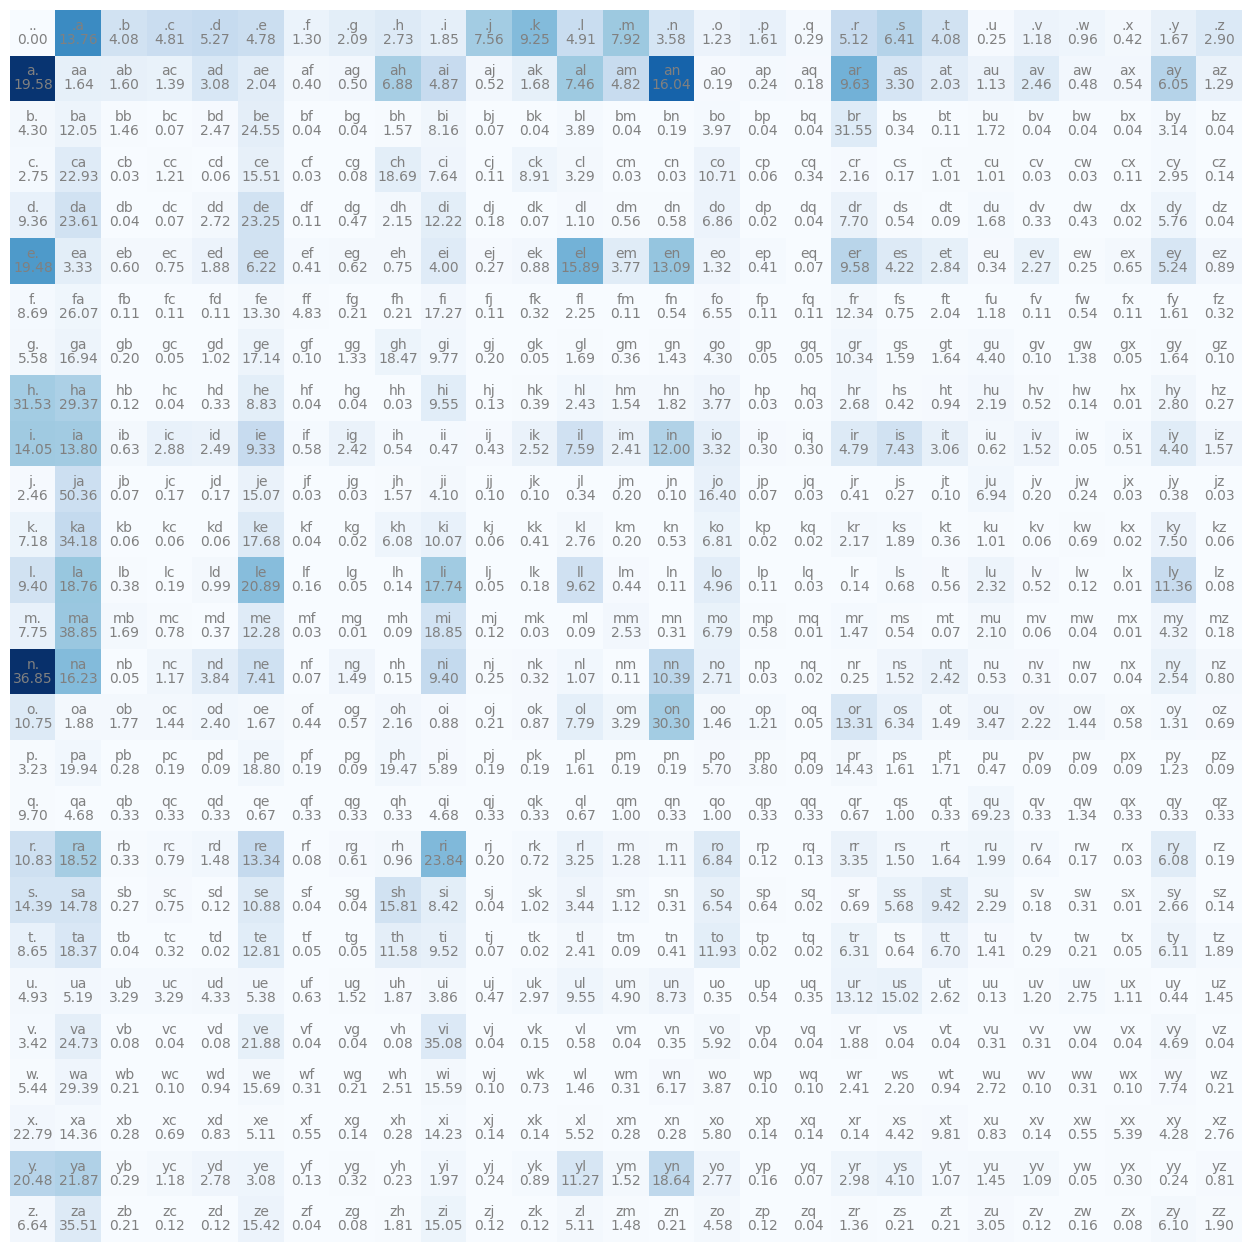

In [257]:
P = N.float() + 1.0 # with model smoothing
P /= P.sum(dim=1, keepdim=True)
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, f"{P[i, j]*100:.2f}", ha="center", va="top", color='gray')
plt.axis('off');

In [258]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(itos[ix], end='')
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [259]:
log_likelihood = 0.0
n=0
for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    row = stoi[ch1]
    col = stoi[ch2]
    prop = P[row,col]
    logprop = torch.log(prop)
    log_likelihood += logprop
    n+=1
    # print(f"{ch1}{ch2} {prop:.4f} {logprop:.4f}")
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n=}")

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


In [260]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()
print(xenc)
print(yenc)

W = torch.randn((27, 27))
logits = xenc @ W # log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
print(probs)

# cross entropy loss
loss = -probs[torch.arange(len(xs)), ys].log().mean()
print(loss)

. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.,

In [261]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    # print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()


In [262]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

for k in range(200):

    # forward pass
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.01 * (W**2).mean()

    # backward pass
    W.grad = None
    loss.backward()

    # update	
    if k > 150:
        W.data -= W.grad * 10
    else:
        W.data -= W.grad * 75

    print(k, loss.data)



0 tensor(3.7686)
1 tensor(3.2384)
2 tensor(3.0154)
3 tensor(2.8892)
4 tensor(2.8099)
5 tensor(2.7555)
6 tensor(2.7150)
7 tensor(2.6836)
8 tensor(2.6583)
9 tensor(2.6378)
10 tensor(2.6207)
11 tensor(2.6065)
12 tensor(2.5945)
13 tensor(2.5843)
14 tensor(2.5755)
15 tensor(2.5679)
16 tensor(2.5611)
17 tensor(2.5553)
18 tensor(2.5499)
19 tensor(2.5453)
20 tensor(2.5410)
21 tensor(2.5372)
22 tensor(2.5337)
23 tensor(2.5306)
24 tensor(2.5277)
25 tensor(2.5251)
26 tensor(2.5227)
27 tensor(2.5205)
28 tensor(2.5184)
29 tensor(2.5166)
30 tensor(2.5148)
31 tensor(2.5133)
32 tensor(2.5118)
33 tensor(2.5104)
34 tensor(2.5091)
35 tensor(2.5079)
36 tensor(2.5068)
37 tensor(2.5057)
38 tensor(2.5047)
39 tensor(2.5038)
40 tensor(2.5029)
41 tensor(2.5021)
42 tensor(2.5013)
43 tensor(2.5006)
44 tensor(2.4998)
45 tensor(2.4992)
46 tensor(2.4985)
47 tensor(2.4980)
48 tensor(2.4974)
49 tensor(2.4968)
50 tensor(2.4963)
51 tensor(2.4958)
52 tensor(2.4953)
53 tensor(2.4949)
54 tensor(2.4944)
55 tensor(2.4941)
56

In [266]:
# Sampling from table model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    ix = 0
    out = []
    while True:
        # Probability approach
        ix = torch.multinomial(P[ix], num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [ ]:
# Sampling from neural network model
g = torch.Generator().manual_seed(2147483647)
logits = W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
for i in range(5):
    ix = 0
    out = []
    while True:
        # My approach
        ix = torch.multinomial(probs[ix], num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.


In [265]:
# Sampling from neural network model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    ix = 0
    out = []
    while True:
        # Andrej approach
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
